# Task 2: Develop Time Series Forecasting Models


**Model Selection**

Given the options of traditional statistical models (ARIMA, SARIMA) and a deep learning model (LSTM) for time series forecasting,

First, import required libraries and script modules

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor
from model_training import ModelTrainer
logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

2024-11-17 10:24:43.809588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:24:44.831119: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 10:24:46.365410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731857087.442515   21335 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731857087.786485   21335 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading the Data**

In [2]:
# Initialize class instances
path = '../data/'
processor = DataPreprocessor(data_dir = path, logger=logger)

# Load the data
tsla_data = processor.load_data('TSLA')


**Prepare the data for Modeling**

In [3]:
# Create trainer instance of ModelTrainer
trainer = ModelTrainer(tsla_data, logger=logger)
# Prepare the data for modeling
trainer.prepare_data()


**Step 1: Train the ARIMA Model**

- optimize the parameters with auto_arima

In [4]:
trainer.train_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17616.723, Time=4.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17621.578, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17623.038, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17623.053, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17623.104, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17621.057, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.241 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2884
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8812.552
Date:                Sun, 17 Nov 2024   AIC                         -17623.104
Time:                        10:25:35   BIC                         -17617.137
Sample:                    01-02-2015   HQIC                        -17620.95

**Step 2: Train the SARIMA Model**

- optimize the parameters with auto_arima

In [5]:
trainer.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=13.94 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-15536.293, Time=0.35 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-16380.617, Time=3.05 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=11.31 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-15550.437, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-16743.460, Time=4.75 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=13.55 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=9.38 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-16739.933, Time=1.87 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-16741.459, Time=11.81 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-16741.445, Time=5.68 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-16743.450, Time=6.61 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-16739.448, Time=5.53 sec
 ARIMA(1,1,0)(2,1,0)[5] intercept   : AIC=-16741.460, Time=12.41 sec

Best model:  ARIMA(1,1,0)(2

**Step 3: Train LSTM model**

2024-11-17 10:27:25.456496: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 60s 170ms/step - loss: 0.0245 - val_loss: 0.0040
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 5/50
 6/80 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 7.5785e-04

80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - loss: 0.0016 - val_loss: 0.0112
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0015 - val_loss: 0.0044
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 16/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/s

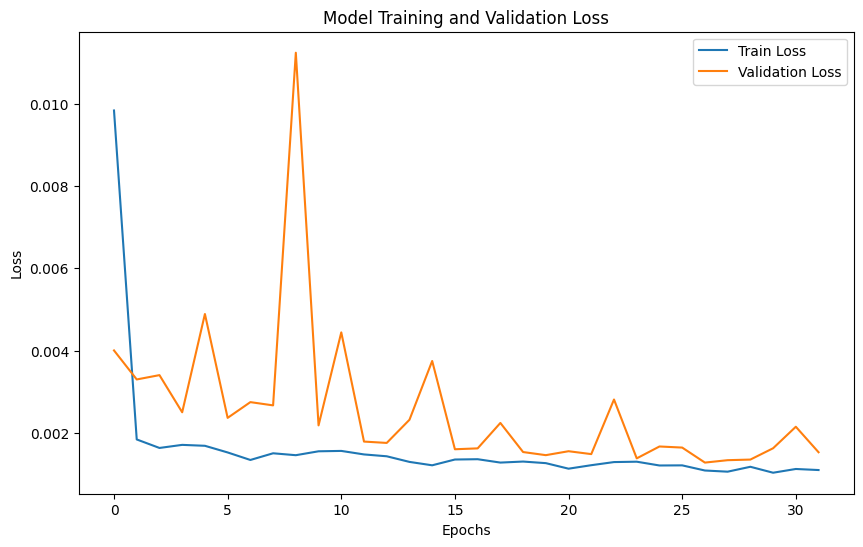

In [6]:
trainer.train_lstm()

**Step 4: Make Predictions**

In [7]:
trainer.make_prediction()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━

**Step 5: Evaluate the models**

The models are evaluating using
- MAE, RSME, MAPE

In [8]:
trainer.evaluate_model()


Model Evaluation Metrics:
     Model       MAE      RMSE       MAPE
0   ARIMA  0.095918  0.121747  18.295472
1  SARIMA  0.092798  0.117217  17.845629
2    LSTM  0.126833  0.150131  29.648569


**Step 6: Compare the models**

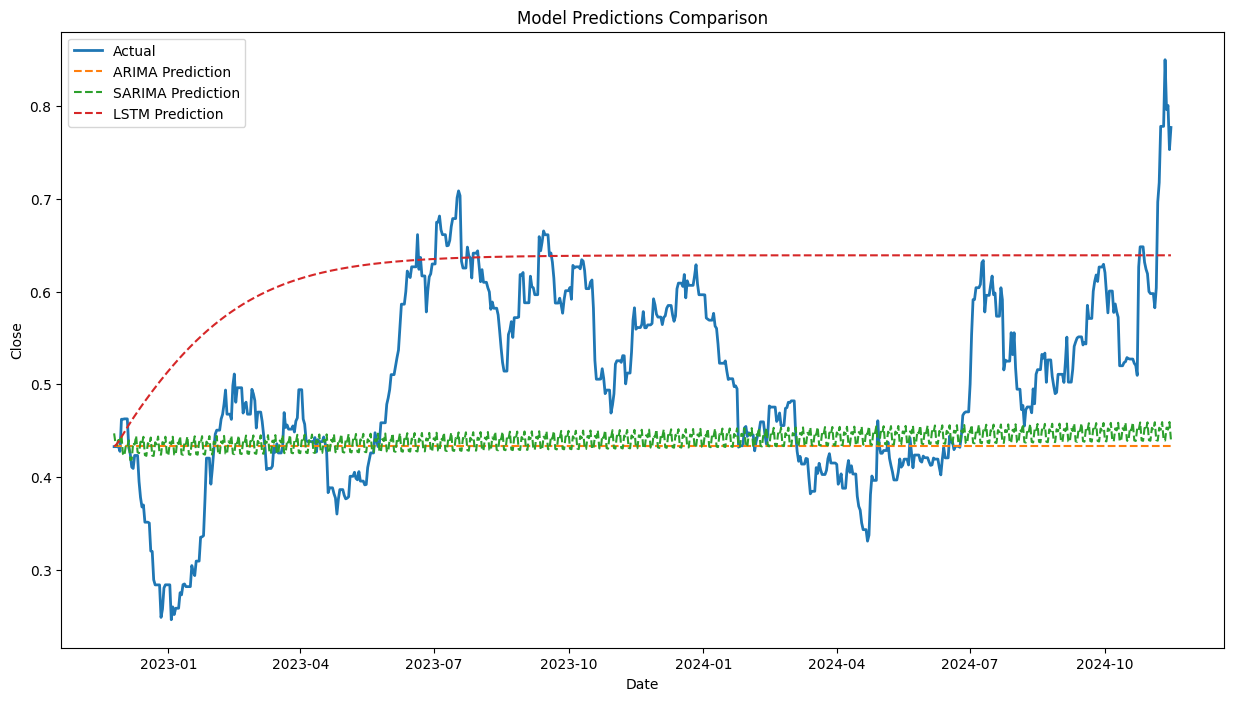

In [9]:
trainer.plot_result()

**Step 7: Forecast the next 6-12 months and save the forecast to csv with confidence interval**

In [10]:
# model_trainer.forecast(months=6, output_file='forecast_6_months.csv')
trainer.forecast(months=12, output_file='../data/tsla_forecast_12_months.csv', best_model='LSTM')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━